<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [2]:
df=pd.read_csv('./data/cookie_cats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [3]:
df.sample(5)

,userid,version,sum_gamerounds,retention_1,retention_7
43092,4764713,gate_30,53,True,True
16560,1843689,gate_40,10,True,False
74816,8288155,gate_30,4,False,False
41692,4610827,gate_40,1,False,False
10666,1177780,gate_30,35,True,True


In [16]:
pd.crosstab(df.version, df.retention_1)

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


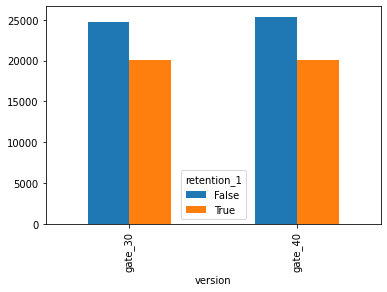

In [5]:
pd.crosstab(df.version, df.retention_1).plot(kind='bar');

In [23]:
z_score, p_value = proportions_ztest([df[df.version=='gate_30']['retention_1'].sum(), df[df.version=='gate_40']['retention_1'].sum()], 
                                     nobs=[df[df.version=='gate_30']['retention_1'].count(), df[df.version=='gate_40']['retention_1'].count()])
z_score, p_value

(1.7840862247974725, 0.07440965529691913)

Hay una descenso de la retención a 1 día en un 1,7% con una seguridad del 92%

In [18]:
pd.crosstab(df.version, df.retention_7)

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


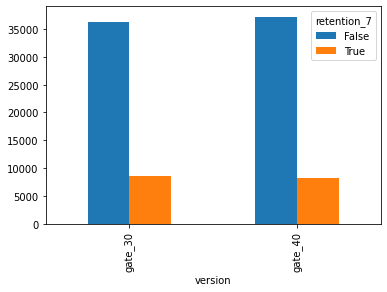

In [19]:
pd.crosstab(df.version, df.retention_7).plot(kind='bar');

In [24]:
z_score, p_value = proportions_ztest([df[df.version=='gate_30']['retention_7'].sum(), df[df.version=='gate_40']['retention_7'].sum()], 
                                     nobs=[df[df.version=='gate_30']['retention_7'].count(), df[df.version=='gate_40']['retention_7'].count()])
z_score, p_value

(3.164358912748191, 0.001554249975614329)

Hay un descenso de la retención a 7 días en un 3% con una seguridad del 99%